In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [8]:
from google.colab import files
uploaded = files.upload()

Saving top50.csv to top50 (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['top50.csv']),encoding='ISO-8859-1')

In [10]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [11]:
print(df.shape)

(50, 14)


In [12]:
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [13]:
df.isnull().sum()
df.fillna(0)

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [14]:
print(df.dtypes)

Unnamed: 0           int64
track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [15]:
# print(type(df['Genre']))
popular_genre=df.groupby('Genre').size()
print(popular_genre)
genre_list=df['Genre'].values.tolist()
print(genre_list)

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64
['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap', 'pop', 'trap music', 'pop', 'country rap', 'electropop', 'reggaeton', 'dance pop', 'pop', 'panamanian pop', 'canadian hip hop', 'dance pop', 'latin', 'dfw rap', 'canadian hip hop', 'escape room', 'pop house', 'country rap', 'reggaeton flow', 'latin', 'electropop', 'canadian pop', 'australian pop', 'canadian hip hop', 'latin', 'latin', 'edm', 'dance pop', 'reggaeton', 'atl hip hop', 'dance pop', 'big room', 'panamanian pop', 'pop', 'boy band', 'dance

In [16]:
print(df.groupby('artist_name').size())
popular_artist=df.groupby('artist_name').size()
print(popular_artist)
artist_list=df['artist_name'].values.tolist()

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64
artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown      

In [17]:
df.isnull().sum()
df.fillna(0)

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [18]:
df.describe()

,Unnamed: 0,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


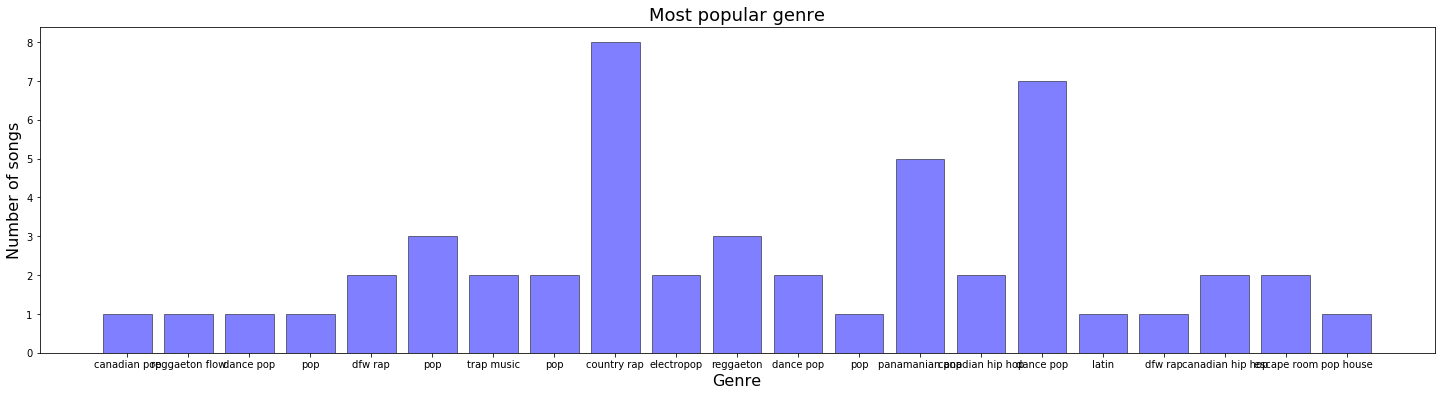

In [19]:
# Bar graph to see the number of songs of each genre
fig, ax=plt.subplots(figsize=(25,6))
length=np.arange(len(popular_genre))
plt.bar(length,popular_genre,color='blue',edgecolor='black',alpha=0.5)
plt.xticks(length,genre_list)
plt.title('Most popular genre',fontsize=18)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Number of songs',fontsize=16)
plt.show()

In [20]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation=df.corr(method='spearman')
print(correlation)

                  Unnamed: 0  beats_per_minute  ...  Speechiness  Popularity
Unnamed: 0             1.000            -0.263  ...       -0.232      -0.221
beats_per_minute      -0.263             1.000  ...        0.392       0.217
Energy                 0.132             0.012  ...       -0.035      -0.044
Danceability           0.053            -0.092  ...        0.104      -0.141
Loudness(dB)          -0.014             0.014  ...       -0.063       0.072
Liveness               0.102            -0.033  ...       -0.137       0.012
Valence                0.113            -0.048  ...       -0.095      -0.265
Length                 0.045            -0.198  ...        0.020      -0.122
Acousticness           0.058            -0.010  ...        0.017       0.036
Speechiness           -0.232             0.392  ...        1.000       0.165
Popularity            -0.221             0.217  ...        0.165       1.000

[11 rows x 11 columns]


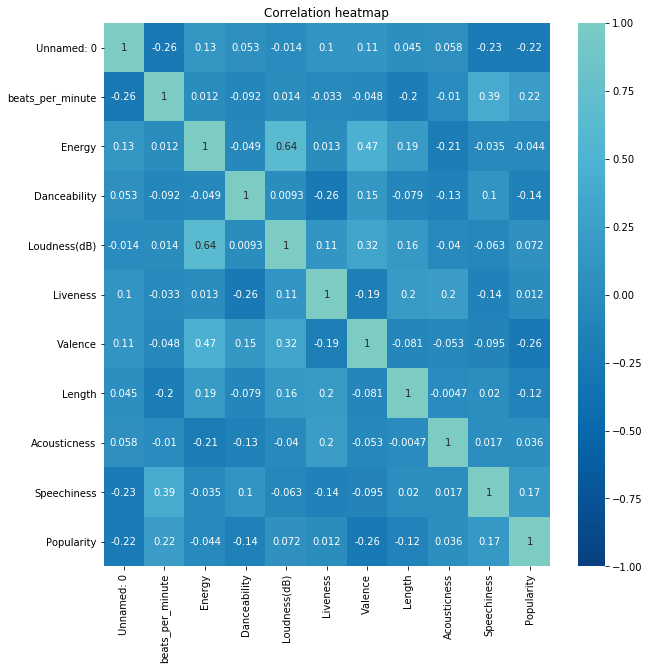

In [21]:
# heatmap of the correlation 
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

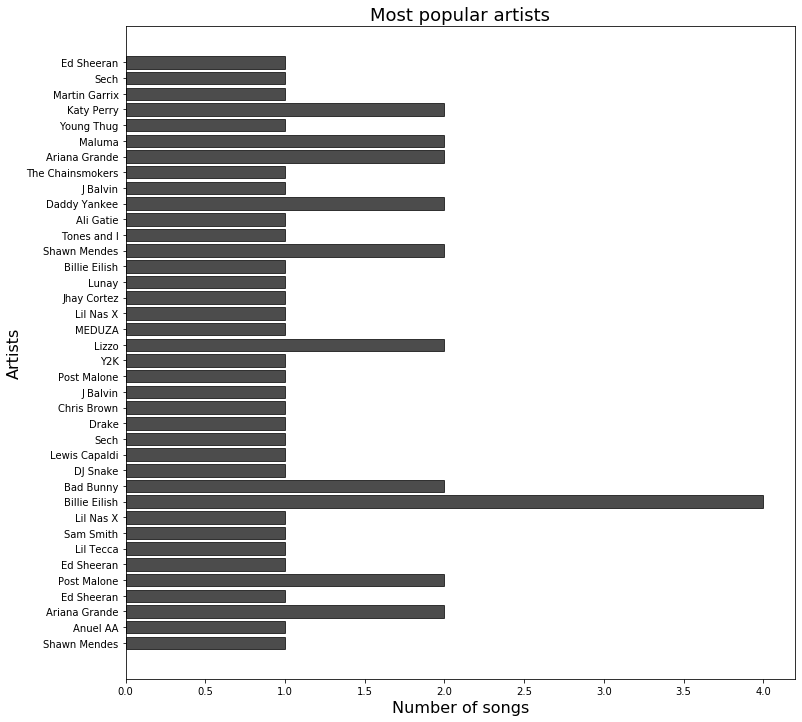

In [22]:
fig, ax=plt.subplots(figsize=(12,12))
length=np.arange(len(popular_artist))
plt.barh(length,popular_artist,color='black',edgecolor='black',alpha=0.7)
plt.yticks(length,artist_list)
plt.title('Most popular artists',fontsize=18)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Number of songs',fontsize=16)
plt.show()

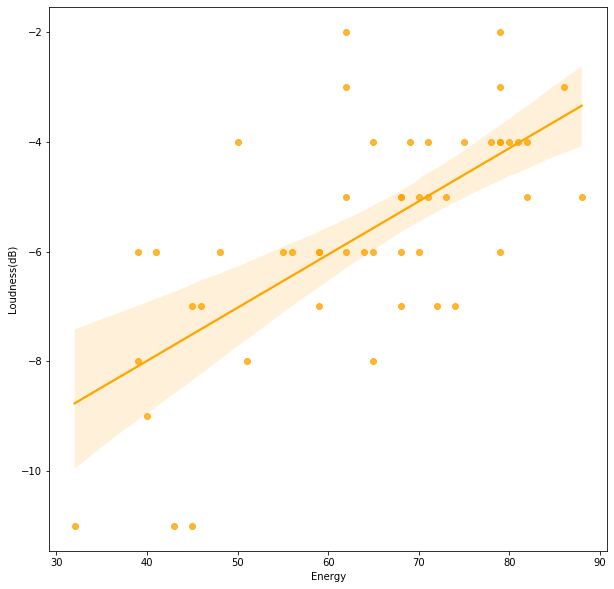

In [23]:
# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Loudness(dB)',data=df,color='orange')

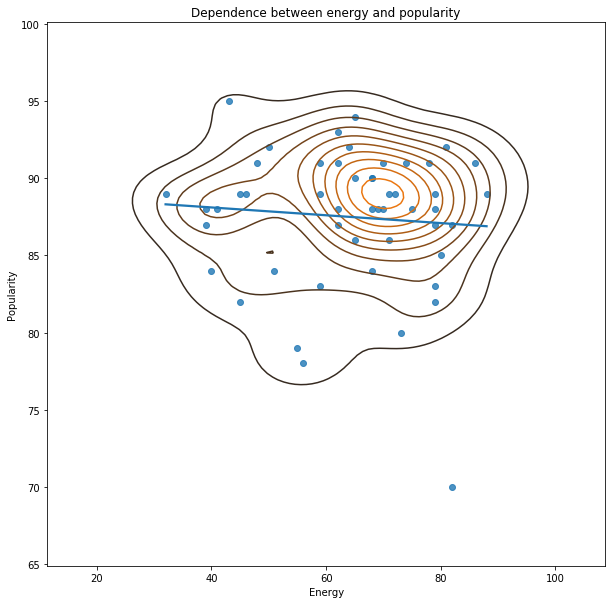

In [24]:
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between energy and popularity')
sns.regplot(x='Energy', y='Popularity',
            ci=None, data=df)
sns.kdeplot(df.Energy,df.Popularity)

In [0]:
#Linear regression
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       89     85.939
1       88     87.334
2       88     84.063
3       84     86.324
4       88     88.654
5       90     91.410
6       88     87.728
7       89     87.021
8       87     86.808
9       84     95.336
10      89     88.525
11      88     86.578
12      85     92.432
13      92     87.765
14      92     86.234


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.0107162138610732
Mean Squared Error: 18.288694705223453
Root Mean Squared Error: 4.276528347295672


Text(0, 0.5, 'Test values')

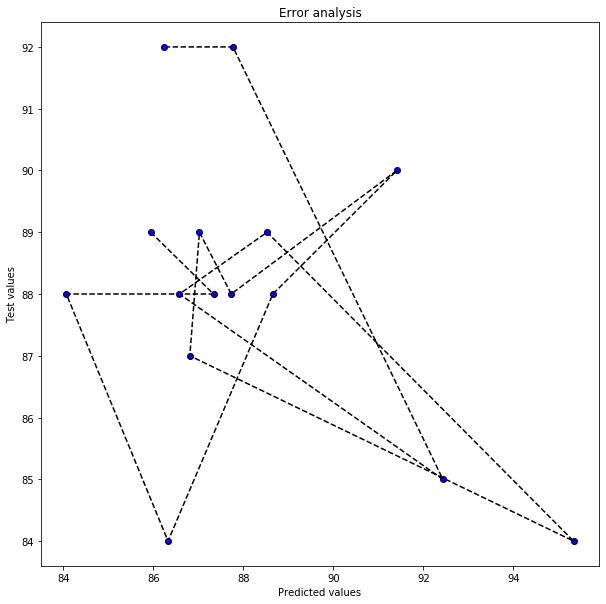

In [30]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='o',markerfacecolor='blue')
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [31]:
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=metrics.mean_squared_error(y_test, y_pred)-abs(mse_mean)
print(diff)

-39.81136721848369
-21.522672513260236


In [0]:
x=df.loc[:,['artist_name']].values
y=df.loc[:,'Genre'].values

In [33]:
# Label encoding of features
x.shape
encoder=LabelEncoder()
x = encoder.fit_transform(x)
x=pd.DataFrame(x)
x

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,32
1,1
2,2
3,9
4,28
5,9
6,20
7,30
8,19
9,4


In [34]:
# Label Encoding of target
Encoder_y=LabelEncoder()
Y = Encoder_y.fit_transform(y)
Y=pd.DataFrame(Y)
Y

,0
0,6
1,19
2,8
3,15
4,9
5,15
6,20
7,15
8,7
9,11


In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [0]:
# KNN Classification
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [0]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

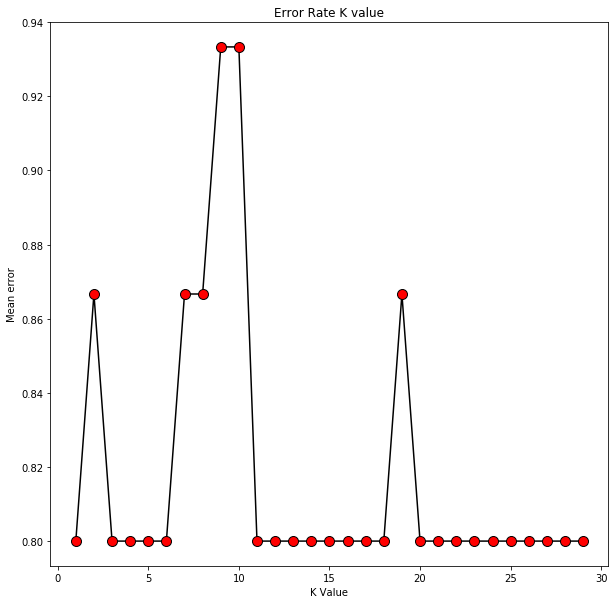

In [41]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error,color='black',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [0]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [0]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       90         91
1       89         89
2       93         88
3       82         87
4       88         88
5       84         88
6       85         87
7       92         84
8       89         91
9       89         88
10      82         91
11      86         83
12      92         87
13      89         88
14      79         89


In [45]:
# Testing the accuracy of Naive Bayes 
scores=cross_val_score(gnb,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

11.363636363636365


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


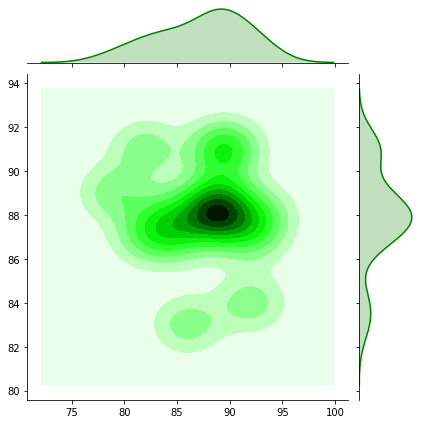

In [47]:
sns.jointplot(x=y_test, y=y_pred, kind="kde", color="g")

In [0]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [51]:
# Linear SVM model 
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       86         83
1       82         87
2       87         91
3       94         94
4       70         70
5       91         91
6       84         84
7       92         92
8       88         91
9       90         90
10      84         84
11      90         91
12      84         88
13      82         91
14      89         88


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
# Testing the accuracy
scores=cross_val_score(LinSVC,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

5.555555555555555


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


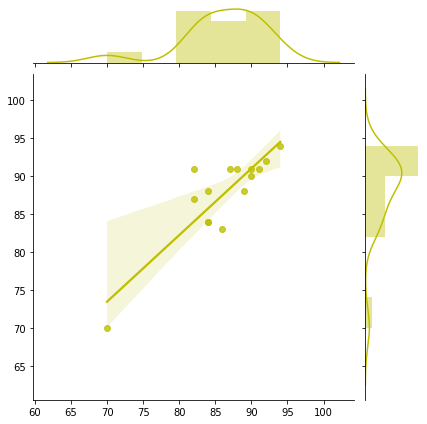

In [53]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color="y");